In [1]:
from stereo3d import stereo_read_from_pickle as std_read
from parsivel import pars_read_from_pickle as pars_read
from multifractal_analysis import spectral_analysis, dtm_analysis, fractal_dimension_analysis, tm_analysis
from multifractal_analysis.general import fluctuations
from multifractal_analysis.general import split_field
from matplotlib import pyplot as plt
import numpy as np 
from pathlib import Path
pars_datafolder = Path("/home/marcio/stage_project/data/saved_events/parsivel02.obj")
stereo_datafolder = Path("/home/marcio/stage_project/data/saved_events/stereo02.obj")

### Read the parsivel and stereo 3D data

In [2]:
# Read the main parsivel series
parsivel_rain_rate = pars_read(pars_datafolder).rain_rate
stereo_rain_rate = std_read(stereo_datafolder).rain_rate()

### Put both arrays in the format

In [3]:
stereo3d_field = split_field(stereo_rain_rate, 7) 
stereo3d_field = stereo3d_field/ np.nanmean(stereo_rain_rate)
parsivel_field = split_field(parsivel_rain_rate, 7)
parsivel_field = parsivel_field/ np.nanmean(parsivel_rain_rate)
stereo3d_field.shape, parsivel_field.shape

((128, 157), (128, 126))

Do the Analisys for each device

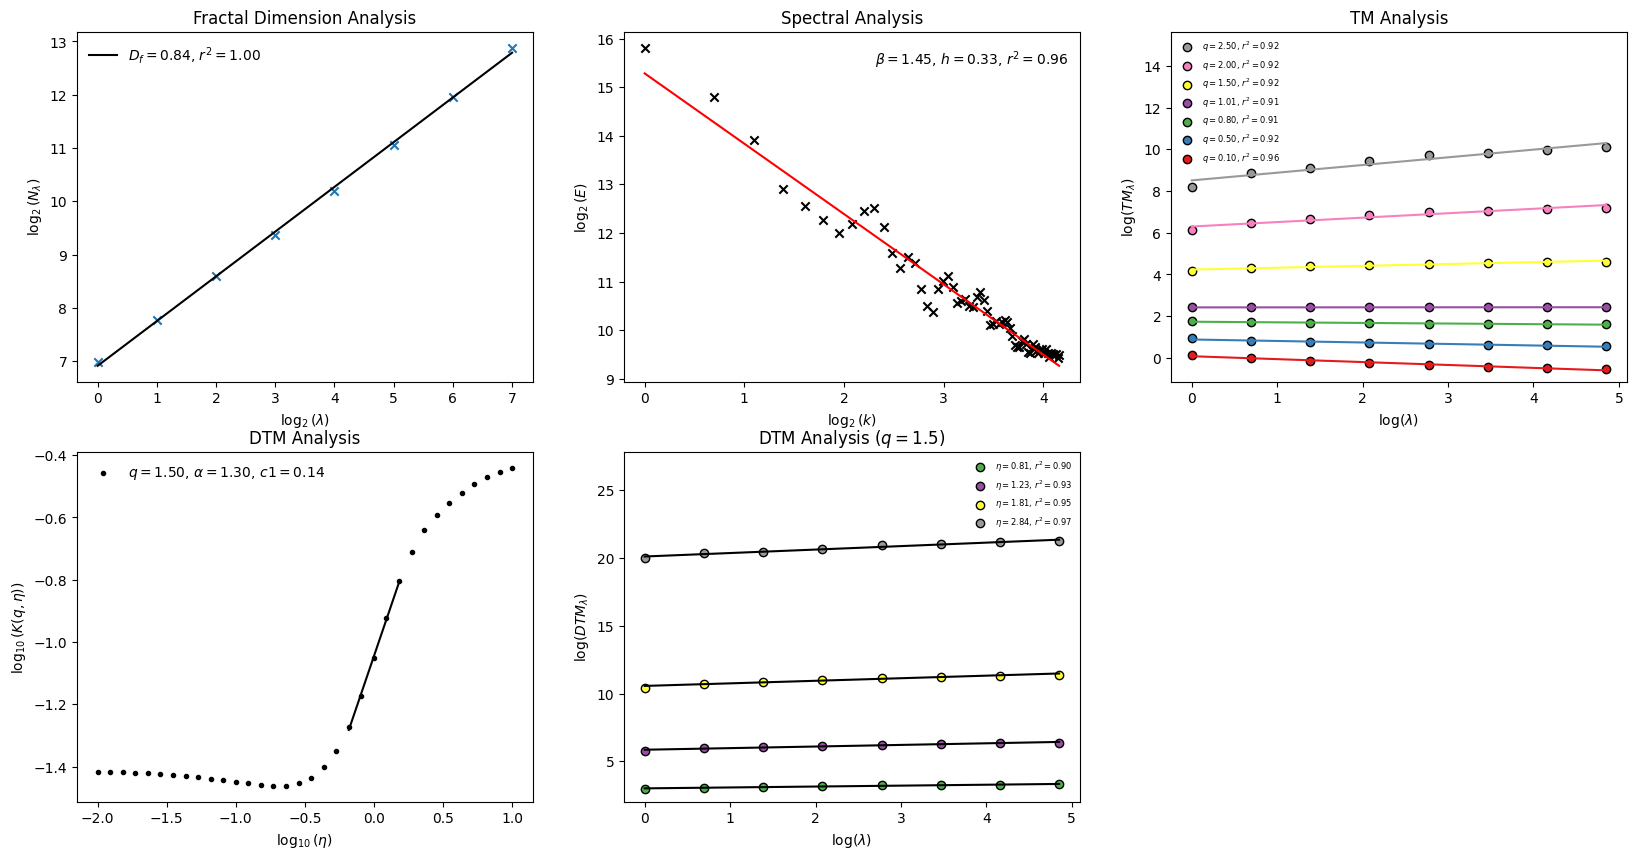

In [4]:
figure = plt.figure()
figure.set_size_inches((20,10))
axs = [figure.add_subplot(2,3,i + 1) for i in range(5)]

# TM
tm_result = tm_analysis(parsivel_field, axs[2])

# Fractal dimension Analysis
df_result = fractal_dimension_analysis(parsivel_field, axs[0])

# DTM
dtm_result = dtm_analysis(parsivel_field, axs[3], axs[4])

# Spectral Analysis
spectral_result = spectral_analysis(parsivel_field, axs[1])



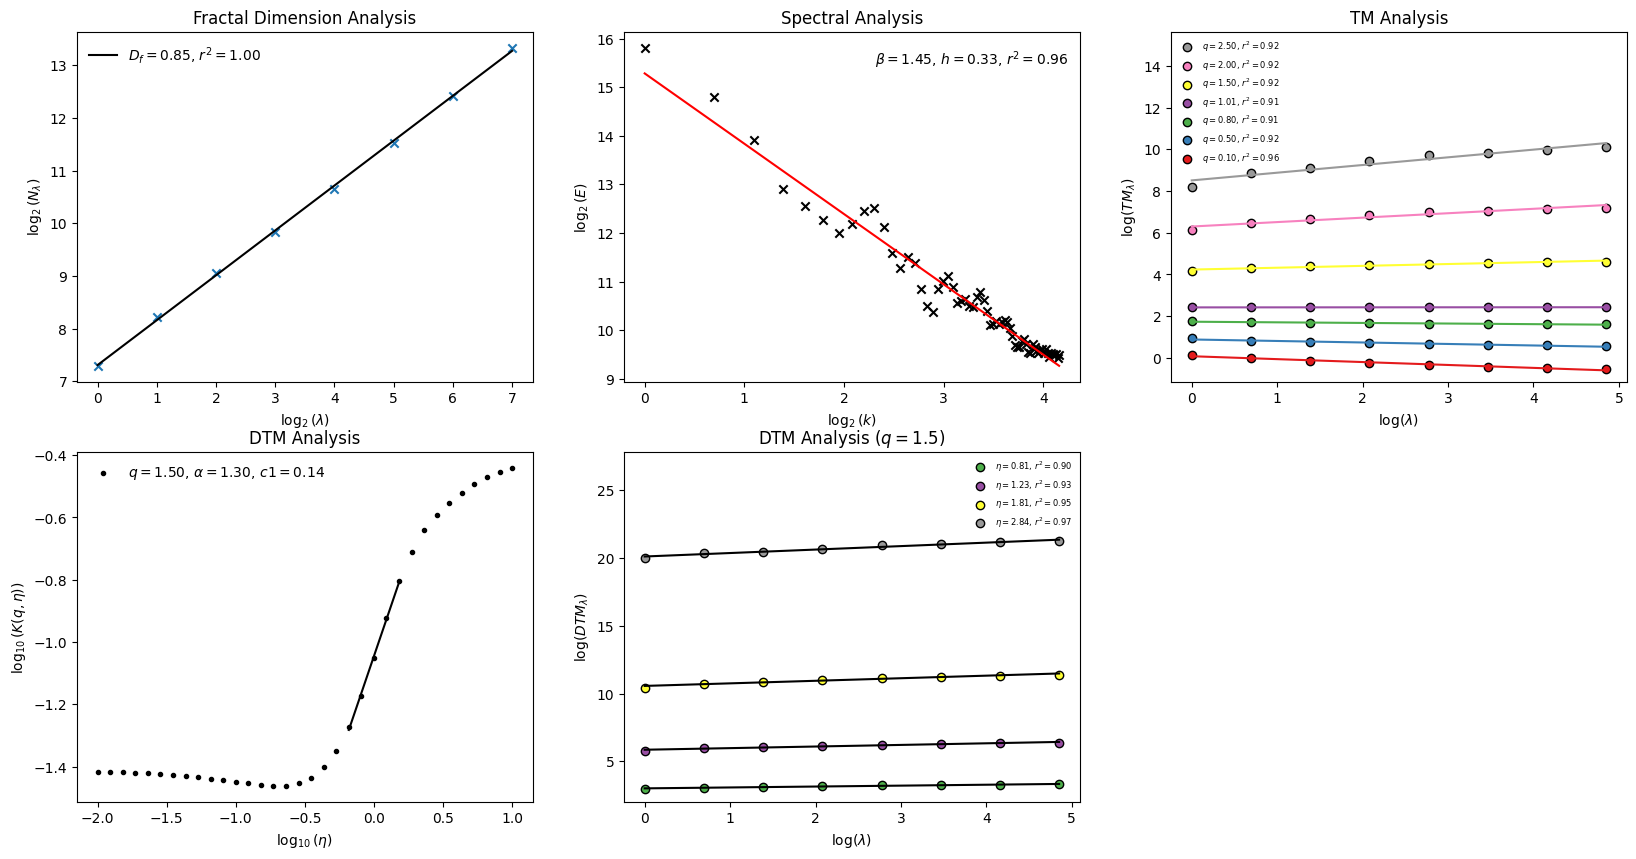

In [5]:
figure = plt.figure()
figure.set_size_inches((20,10))
axs = [figure.add_subplot(2,3,i + 1) for i in range(5)]

# Fractal dimension Analysis
df_result = fractal_dimension_analysis(stereo3d_field, axs[0])

# Spectral Analysis
spectral_result = spectral_analysis(parsivel_field, axs[1])

# TM
tm_result = tm_analysis(parsivel_field, axs[2])

# DTM
dtm_result = dtm_analysis(parsivel_field, axs[3], axs[4])


#### Do the same for fluctuations

In [6]:
stereo3d_fluctuations = fluctuations(stereo3d_field)
stereo3d_fluctuations = stereo3d_fluctuations / np.mean(stereo3d_fluctuations)
parsivel_fluctuations = fluctuations(parsivel_field)
parsivel_fluctuations = parsivel_fluctuations / np.mean(parsivel_fluctuations)

In [7]:
np.max(parsivel_field)

881.7547052766834

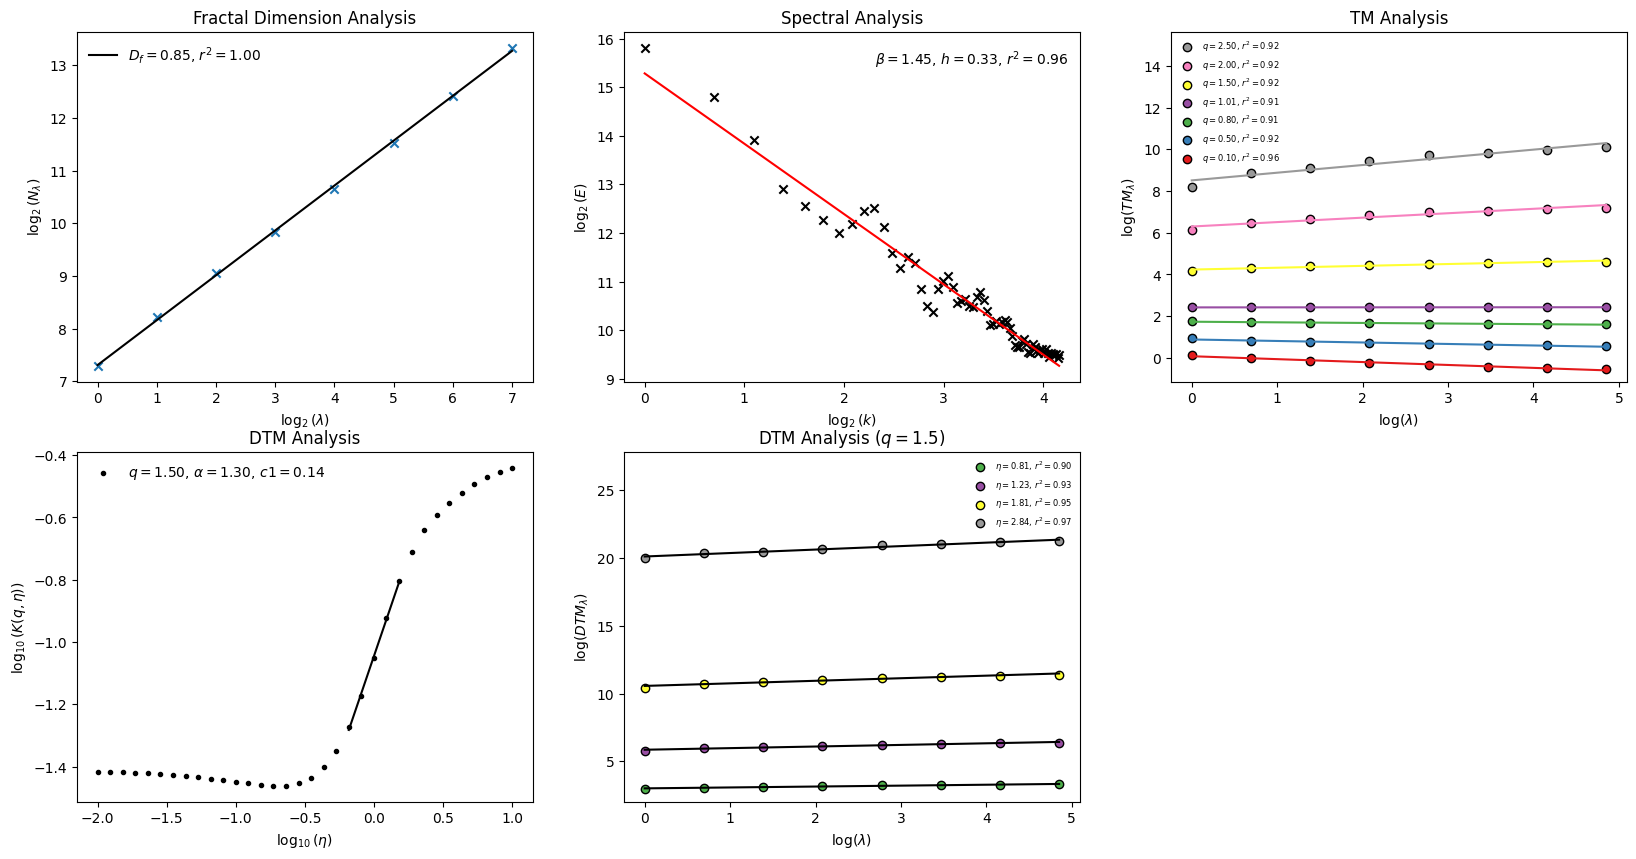

In [8]:
figure = plt.figure()
figure.set_size_inches((20,10))
axs = [figure.add_subplot(2,3,i + 1) for i in range(5)]

# Fractal dimension Analysis
df_result = fractal_dimension_analysis(stereo3d_field, axs[0])

# Spectral Analysis
spectral_result = spectral_analysis(parsivel_field, axs[1])

# TM
tm_result = tm_analysis(parsivel_field, axs[2])

# DTM
dtm_result = dtm_analysis(parsivel_field, axs[3], axs[4])
